# Laboratoar Procesarea semnalelor

In [1]:
import numpy as np
import matplotlib.pylab as plt
import sounddevice as sd
import scipy.io.wavfile as wavfile
import math 

### Laboratorul 1

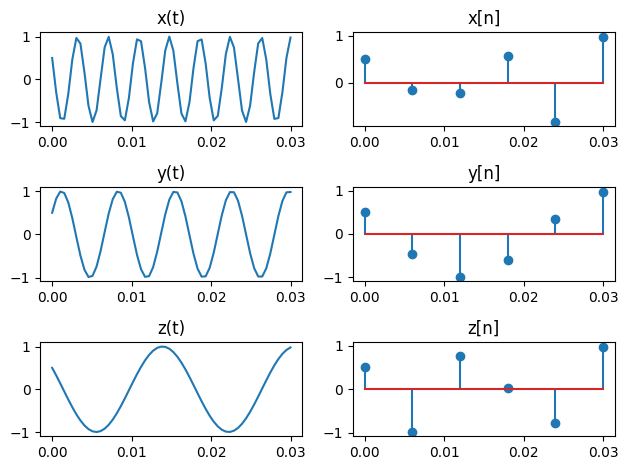

In [3]:
#1

fig, axs = plt.subplots(3, 2)

t = np.linspace(0, 0.03, int(0.03/0.0005))  
t1 = np.linspace(0, 0.03, int(0.03/0.005))  #  200 Hz->pas de 0.005

x1 = np.cos(520*np.pi*t + np.pi/3)
x2 = np.cos(280*np.pi*t - np.pi/3)
x3 = np.cos(120*np.pi*t + np.pi/3)

x1_sampled = np.cos(520*np.pi*t1 + np.pi/3)
x2_sampled = np.cos(280*np.pi*t1 - np.pi/3)
x3_sampled = np.cos(120*np.pi*t1 + np.pi/3)

axs[0, 0].plot(t, x1)
axs[0, 0].set_title('x(t)')
axs[1, 0].plot(t, x2)
axs[1, 0].set_title('y(t)')
axs[2, 0].plot(t, x3)
axs[2, 0].set_title('z(t)')

axs[0, 1].stem(t1, x1_sampled)
axs[0, 1].set_title('x[n]')
axs[1, 1].stem(t1, x2_sampled)
axs[1, 1].set_title('y[n]')
axs[2, 1].stem(t1, x3_sampled)
axs[2, 1].set_title('z[n]')

plt.tight_layout()
plt.show()


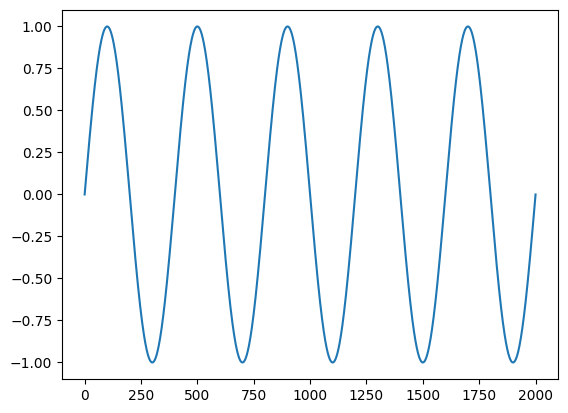

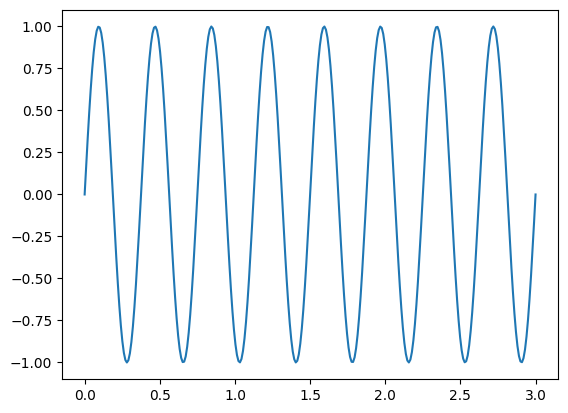

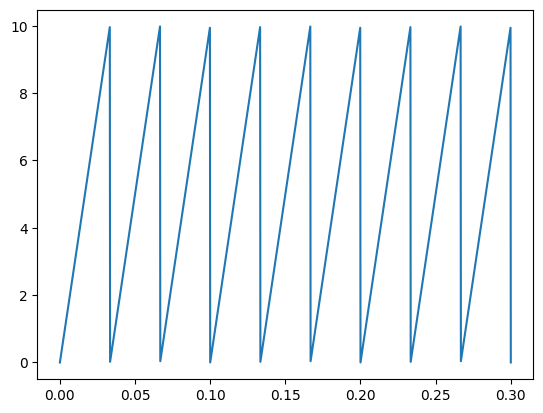

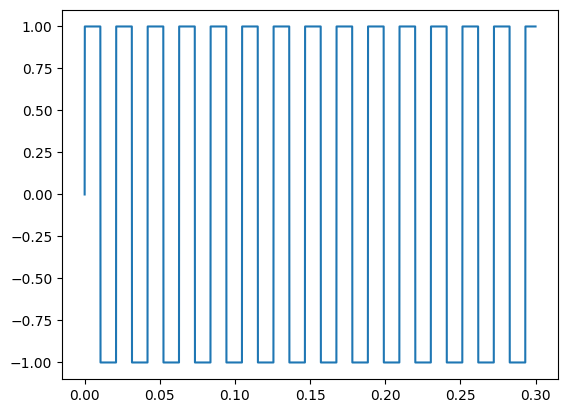

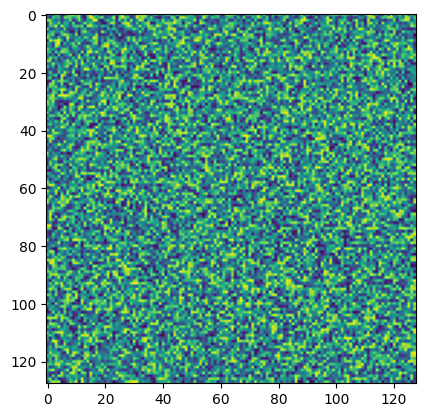

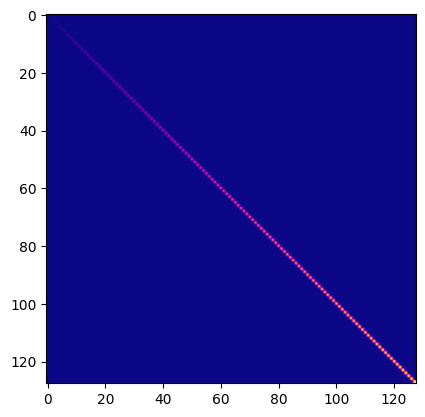

: 

In [ ]:
#2
# a)
t1 = np.linspace(0, 2000, 1600)
x1 = np.sin(2 * np.pi * (1 / 400) * t1)
plt.figure()
plt.plot(t1, x1)
plt.show()

# b)
t2 = np.linspace(0, 3, 300)
x2 = np.sin(2 * np.pi * 800 * t2)
plt.figure()
plt.plot(t2, x2)
plt.show()

# c)
t3 = np.linspace(0, 0.3, 1600)
x3 = 300 * t3 % 10
plt.figure()
plt.plot(t3, x3)
plt.show()

# d)
t4 = np.linspace(0, 0.3, 5000)
x4 = np.sign(np.sin(t4 * 300))
plt.figure()
plt.plot(t4, x4)
plt.show()

# e)
t5 = np.random.rand(128, 128)
plt.figure()
plt.imshow(t5, cmap="viridis")
plt.show()

# f)
t6 = np.eye(128, 128)
for i in range(len(t6)):
    t6[i, i] = i
plt.figure()
plt.imshow(t6, cmap="plasma")
plt.show()


#### Exercițiul 3

#### a) Semnal digitalizat
Semnal digitalizat la o frecvență de **2000 de eșantioane/secundă**, atunci avem distanța dintre eșantioane:
$$
T = \frac{1}{2000} = 0.0005 \, \text{secunde} \, \text{(sau 0.5 ms)}.
$$

#### b) Eșantion memorat
- Fiecare eșantion este memorat pe **4 biți**, adică **0.5 bytes**.
- O oră are **3600 secunde**, iar la 2000 de eșantioane pe secundă:
$$
\text{Număr total de eșantioane} = 2000 \times 3600 = 7\,200\,000 \, \text{eșantioane}.
$$
- Dimensiunea totală a memoriei necesare:
$$
\text{Memorie totală} = 0.5 \times 2000 \times 3600 = 3\,600\,000 \, \text{bytes}.
$$

#### Rezultat
- **Memorie totală necesară pentru o oră**: **3.6 MB** (3,600,000 bytes).



### Laboratorul 2

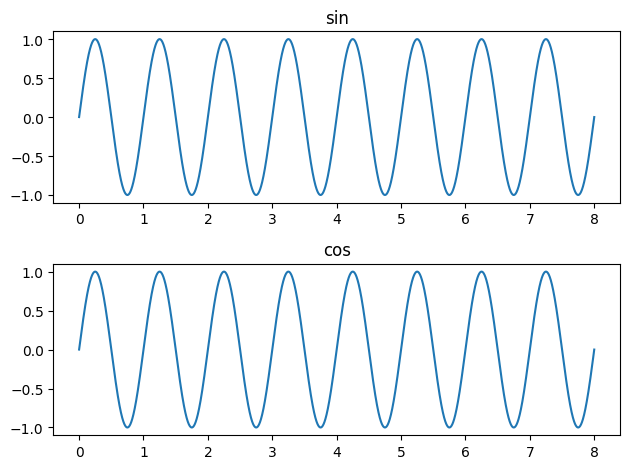

: 

In [ ]:
1#

fig, axs = plt.subplots(2)
t = np.linspace(0, 8, 10000)
x1 = np.sin(2*np.pi*t)
x2= np.cos(2*np.pi*t+3*np.pi/2)



axs[0].plot(t, x1)  
axs[0].set_title('sin')
axs[1].plot(t, x2)
axs[1].set_title('cos')

plt.tight_layout()
plt.show()

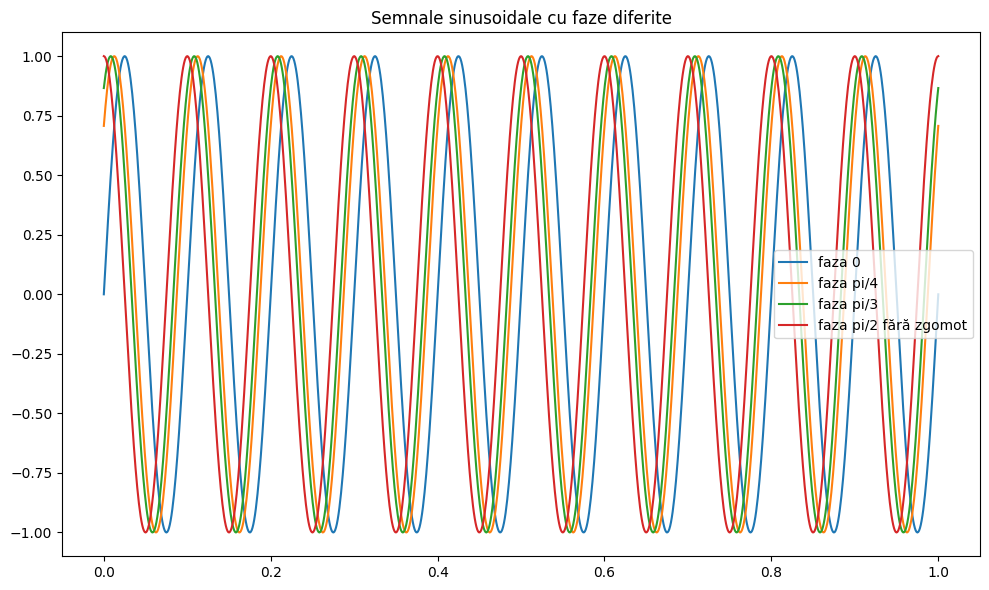

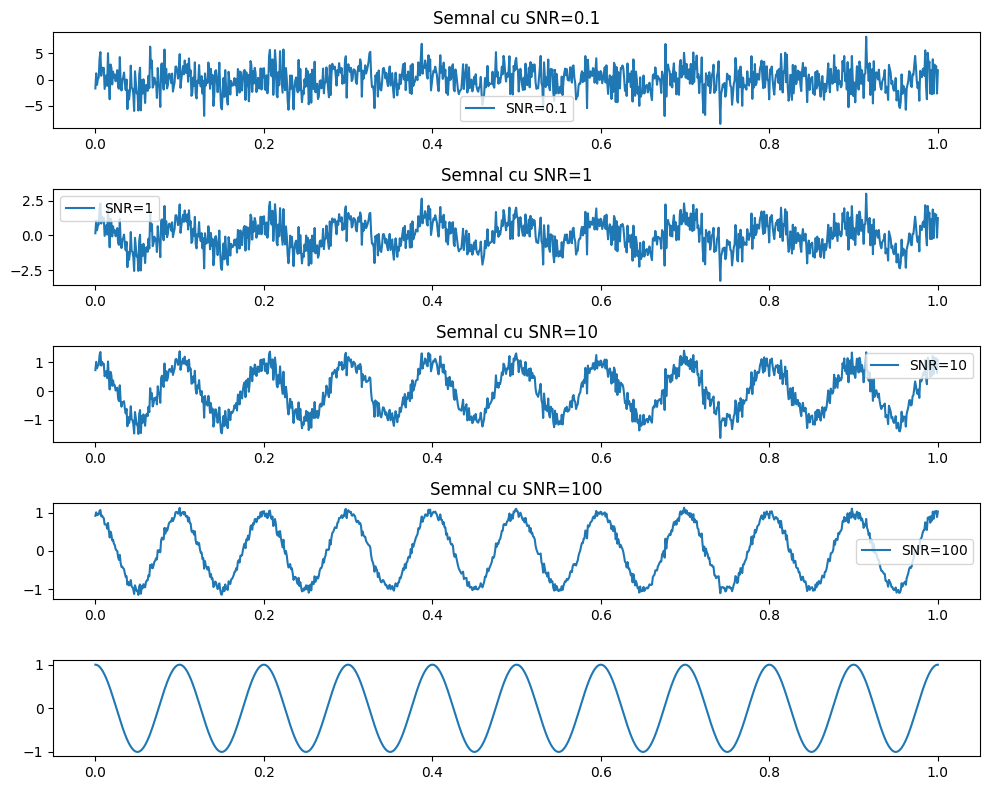

: 

In [ ]:
#2

Fs = 1000
T = 1
f = 10

t = np.linspace(0, T, Fs)

x1 = np.sin(2 * np.pi * f * t)
x2 = np.sin(2 * np.pi * f * t + np.pi / 4)
x3 = np.sin(2 * np.pi * f * t + np.pi / 3)
x4 = np.sin(2 * np.pi * f * t + np.pi / 2)

z = np.random.normal(0, 1, len(t))
snr_values = [0.1, 1, 10, 100]
signals_with_noise = []

for snr in snr_values:
    norm_x4 = np.linalg.norm(x4)
    norm_z = np.linalg.norm(z)
    gamma = norm_x4 / (np.sqrt(snr) * norm_z)
    noisy_signal = x4 + gamma * z
    signals_with_noise.append(noisy_signal)

plt.figure(figsize=(10, 6))
plt.plot(t, x1, label="faza 0")
plt.plot(t, x2, label="faza pi/4")
plt.plot(t, x3, label="faza pi/3")
plt.plot(t, x4, label="faza pi/2 fără zgomot")
plt.title("Semnale sinusoidale cu faze diferite")
plt.legend()
plt.tight_layout()
plt.show()

fig, axs = plt.subplots(5, 1, figsize=(10, 8))

for i, snr in enumerate(snr_values):
    axs[i].plot(t, signals_with_noise[i], label=f"SNR={snr}")
    axs[i].set_title(f"Semnal cu SNR={snr}")
    axs[i].legend()

axs[4].plot(t, x4, label="faza pi/2 fără zgomot")
plt.tight_layout()
plt.show()


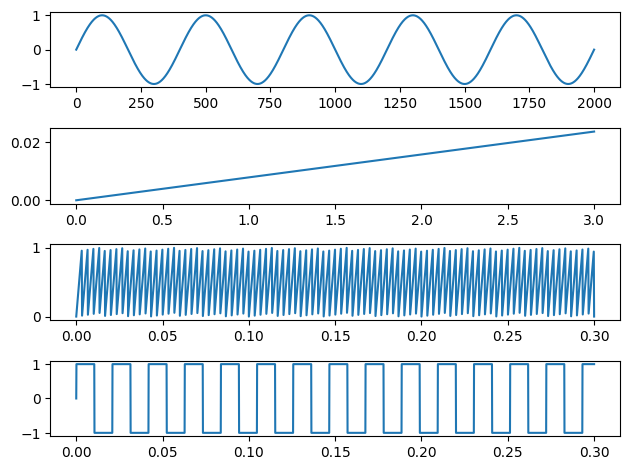

: 

In [ ]:
#3

t1 = np.linspace(0, 2000, 1600)
x1 = np.sin(2*np.pi*(1/400)*t1)

t2 = np.linspace(0, 3, 300)
x2 = np.sin(2*np.pi*(1/800)*t2)

t3 = np.linspace(0, 0.3, 1600)
x3 = 300 * t3 % 1

t4 = np.linspace(0, 0.3, 5000)
x4 = np.sign(np.sin(t4 * 300))


fs = 44100
sd.play(x1, fs)
sd.wait()

sd.play(x2, fs)
sd.wait()

sd.play(x3, fs)
sd.wait()

sd.play(x4, fs)
sd.wait()


rate = 44100
wavfile.write('semnal_a.wav', rate, x1)


rate_loaded, x_loaded = wavfile.read('semnal_a.wav')
sd.play(x_loaded, rate_loaded)
sd.wait()


fig, axs = plt.subplots(4)
axs[0].plot(t1, x1)
axs[1].plot(t2, x2)
axs[2].plot(t3, x3)
axs[3].plot(t4, x4)

plt.tight_layout()
plt.show()


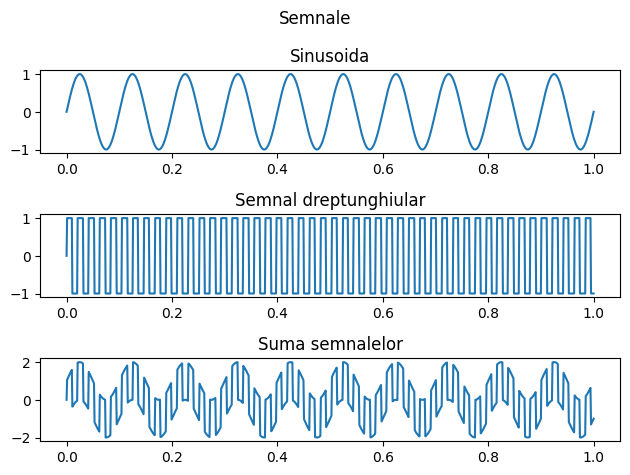

: 

In [ ]:
#4

Fs = 1000
T = 1
f = 10

t = np.linspace(0, T, Fs)
x1 = np.sin(2 * np.pi * f * t)
x2 = np.sign(np.sin(t*300))
x_sum = x1 + x2

fig, axs = plt.subplots(3)
fig.suptitle('Semnale')
axs[0].plot(t, x1)
axs[0].set_title('Sinusoida')
axs[1].plot(t, x2)
axs[1].set_title('Semnal dreptunghiular')
axs[2].plot(t, x_sum)
axs[2].set_title('Suma semnalelor')
plt.tight_layout()
plt.show()


In [ ]:
#5

Fs = 20000
T = 20
f = 10

t = np.linspace(0, T, Fs)
x1 = np.sin(2 * np.pi * f * t)
x2 = np.sin(2 * np.pi * 1.7 * f * t)
x = np.concatenate((x1, x2))

fs = 44100
sd.play(x, fs)
sd.wait()


: 

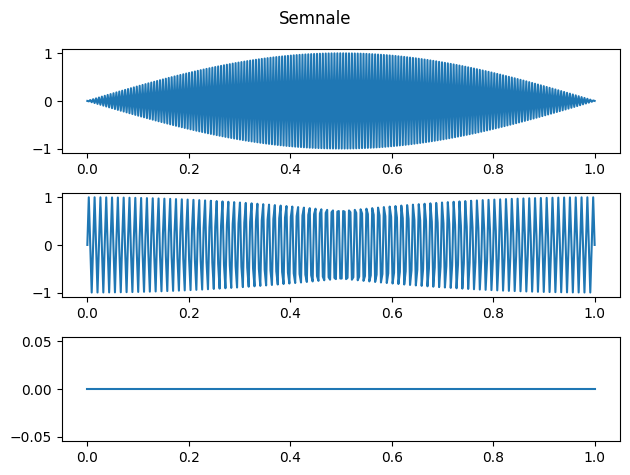

: 

In [ ]:
#6
Fs = 350
T = 1


t = np.linspace(0, T, Fs)
x1 = np.sin(2 * np.pi * Fs/2 * t)
x2 = np.sin(2 * np.pi * Fs/4 * t)
x3 = np.sin(2 * np.pi * 0 * t)

fig, axs = plt.subplots(3)
fig.suptitle('Semnale')
axs[0].plot(t, x1)

axs[1].plot(t, x2)

axs[2].plot(t, x3)

plt.tight_layout()
plt.show()


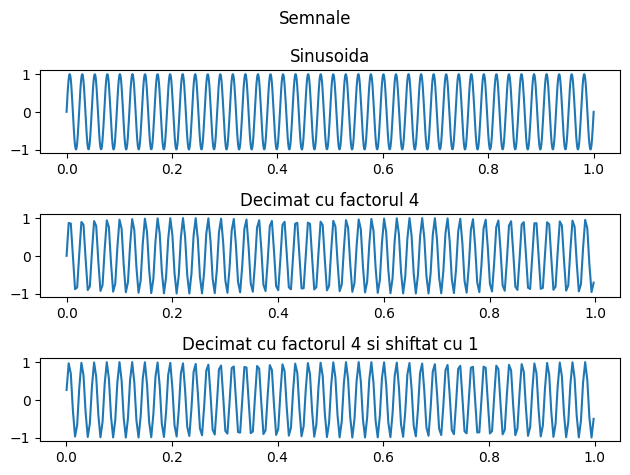

: 

In [ ]:
#7
Fs = 1000
T = 1
f = 42

t = np.linspace(0, T, Fs)
x1 = np.sin(2 * np.pi * f * t)
x1_decimated = x1[::4]
t1_decimated = t[::4]

x2_decimated = x1[1::4]
t2_decimated = t[1::4]

fig, axs = plt.subplots(3)
fig.suptitle('Semnale')
axs[0].plot(t, x1)
axs[0].set_title('Sinusoida')
axs[1].plot(t1_decimated, x1_decimated)
axs[1].set_title('Decimat cu factorul 4')
axs[2].plot(t2_decimated, x2_decimated)
axs[2].set_title('Decimat cu factorul 4 si shiftat cu 1')


plt.tight_layout()
plt.show()


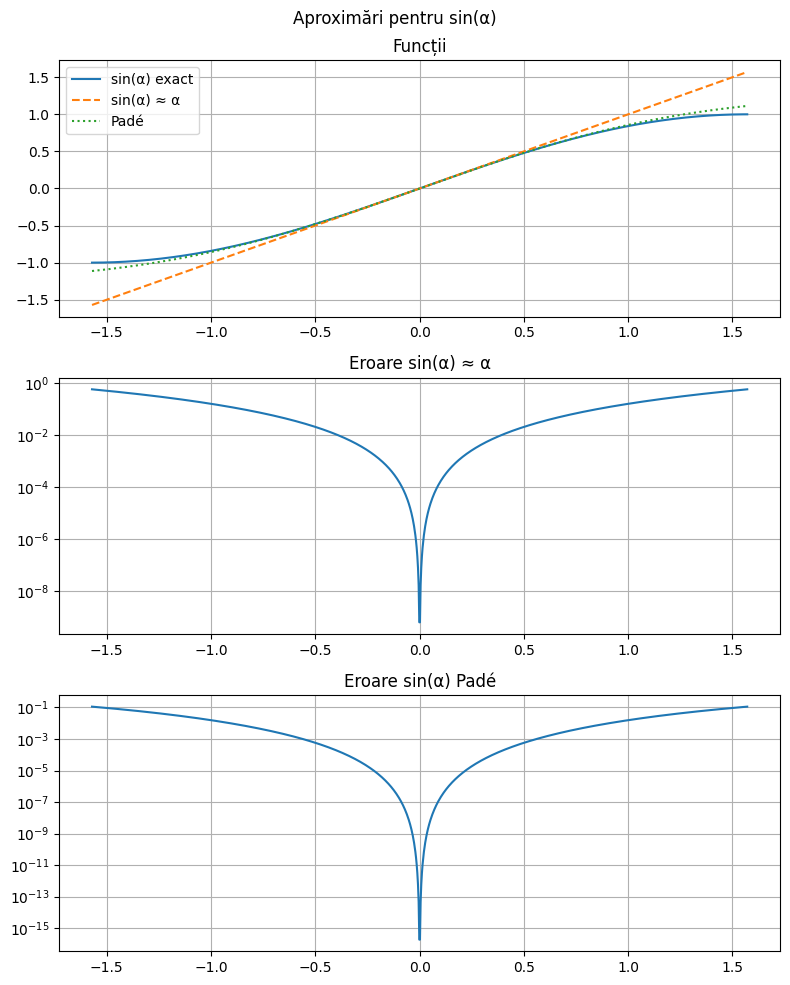

: 

In [ ]:
#8

Fs = 1000
T = 1
alpha = np.linspace(-np.pi / 2, np.pi / 2, Fs)


x1 = np.sin(alpha)  
x2 = alpha          
x3 = alpha / (1 + (alpha ** 2) / 6)  


error_approx = np.abs(x2 - x1) 
error_pade = np.abs(x3 - x1)   


fig, axs = plt.subplots(3, figsize=(8, 10))
fig.suptitle('Aproximări pentru sin(α)')


axs[0].plot(alpha, x1, label="sin(α) exact")
axs[0].plot(alpha, x2, label="sin(α) ≈ α", linestyle="--")
axs[0].plot(alpha, x3, label="Padé", linestyle=":")
axs[0].set_title('Funcții')
axs[0].legend()
axs[0].grid()


axs[1].semilogy(alpha, error_approx)
axs[1].set_title('Eroare sin(α) ≈ α')
axs[1].grid()


axs[2].semilogy(alpha, error_pade)
axs[2].set_title('Eroare sin(α) Padé')
axs[2].grid()

plt.tight_layout()
plt.show()



### Laboratorul 3

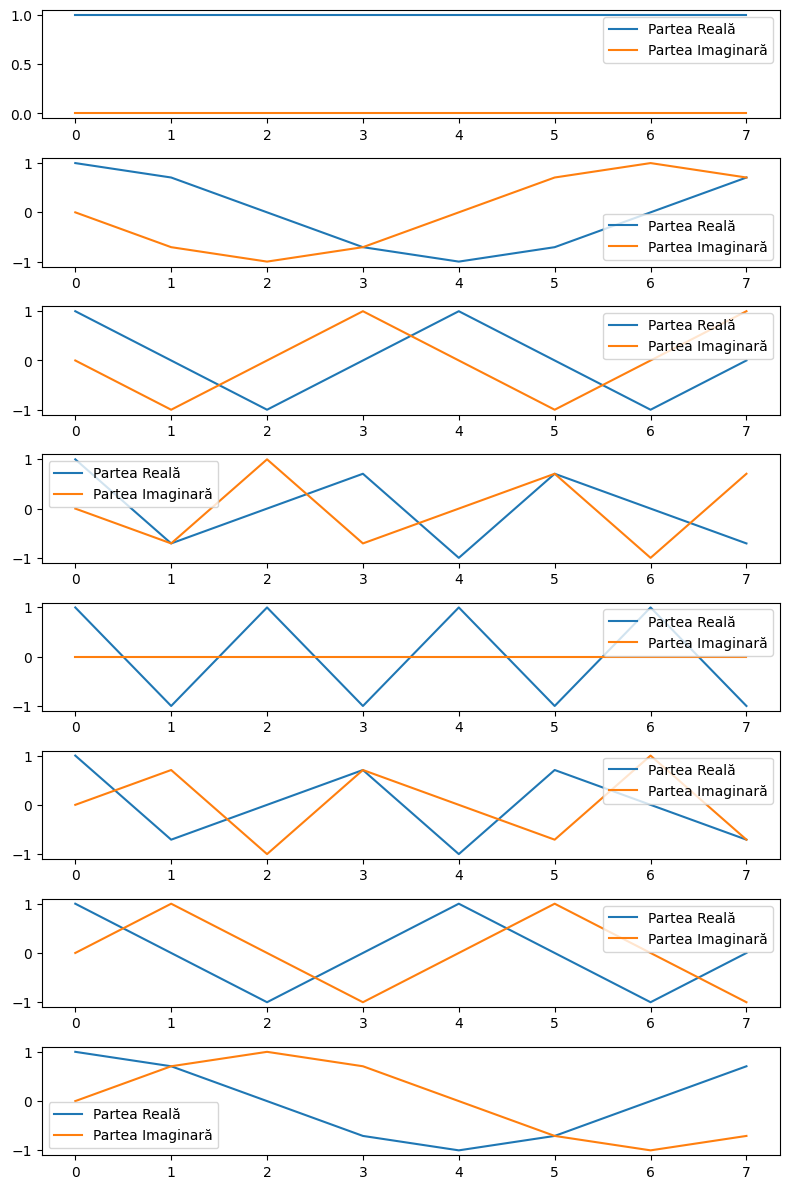

True


: 

In [ ]:
#ex1

N = 8
F = [[math.e**(-2j * math.pi * m * n / N) for n in range(N)] for m in range(N)]
F1 = np.array(F)
x_imaginary = np.imag(F1)
x_real = np.real(F1)

fig, axs = plt.subplots(N, figsize=(8, 12))
for i in range(N):
    axs[i].plot(x_real[i], label='Partea Reală')
    axs[i].plot(x_imaginary[i], label='Partea Imaginară')
    axs[i].legend()
plt.tight_layout()
plt.show()

F_conj_transpose = np.conj(F1).T
FFH = np.matmul(F1, F_conj_transpose)
print(np.allclose(FFH, N * np.eye(N)))


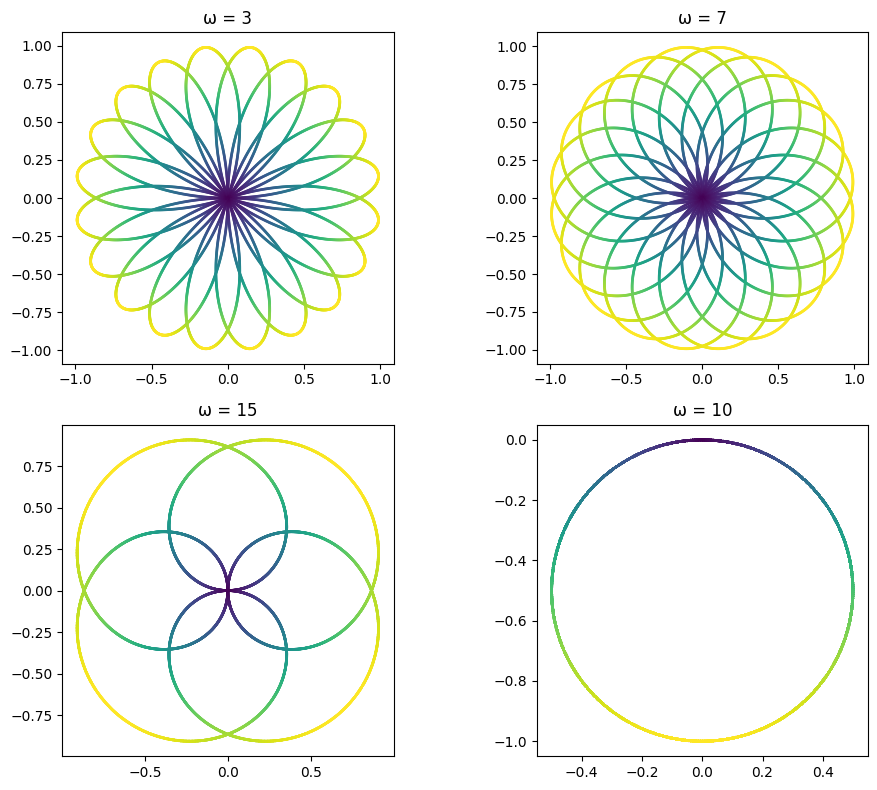

In [ ]:
#2

f = 10
T = 1
Fs = 10000
omega = [3, 7, 15, f]
t = np.linspace(0, T, Fs, endpoint=False)
s = np.sin(2 * np.pi * f * t)

fig, axs = plt.subplots(2, 2, figsize=(10, 8))
n = np.arange(len(t))

for idx, o in enumerate(omega):
    z = [s[i]*math.e ** (-2 * np.pi * 1j * o * i / len(s)) for i in range(len(s))]
    ax = axs[idx // 2][idx % 2]
    sc = ax.scatter(np.real(z), np.imag(z), c=np.abs(z), cmap='viridis', s=1)
    ax.set_aspect('equal')
    ax.set_title(f'ω = {o}')
plt.tight_layout()
plt.show()


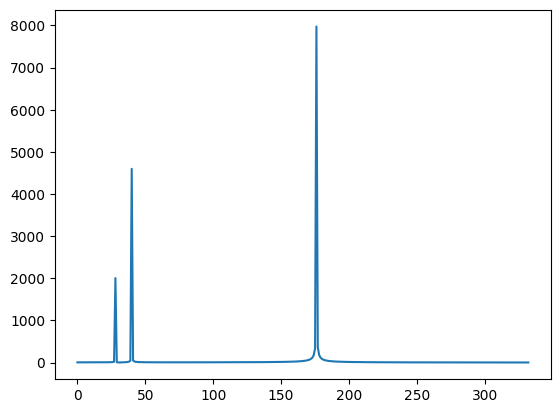

In [12]:
#ex3
f = 10
f2 = 7
f3 = 44
fe = 1000
ft = 3
T = 4
N = T * fe

t = np.linspace(0,T,N)
s1 =np.sin(2*np.pi*f*t)
s2 = np.sin(2*np.pi*f2*t+np.pi/5)
s3 = np.cos(2*np.pi*f3*t)
fourier_matrix = np.array([[np.exp(-2j * np.pi * m * n / N) for n in range(N)] for m in range(N)])

s = 2.3*s1+s2+4*s3

sf = np.matmul(fourier_matrix, s)

sfabs = np.abs(sf)

plt.plot(sfabs[:N//12])













### Laboratorul 4

### Laboratorul 5

### Laboratorul 6